In [7]:
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
from drawer import plot_spectogram, plot, spectral_difference
import nmf

FRAME1 = 4096
HOP = 2048
MAX_ITER = 20

In [8]:
part1_org, sr = librosa.load('../data/sound2.wav')
part2_org, sr = librosa.load('../data/sound1.wav')

trim = min(len(part1_org), len(part2_org))

part1_org = part1_org[:trim]
part2_org = part2_org[:trim]

orgs = np.vstack([part1_org, part2_org])

display(ipd.Audio(part1_org, rate = sr))
display(ipd.Audio(part2_org, rate = sr))

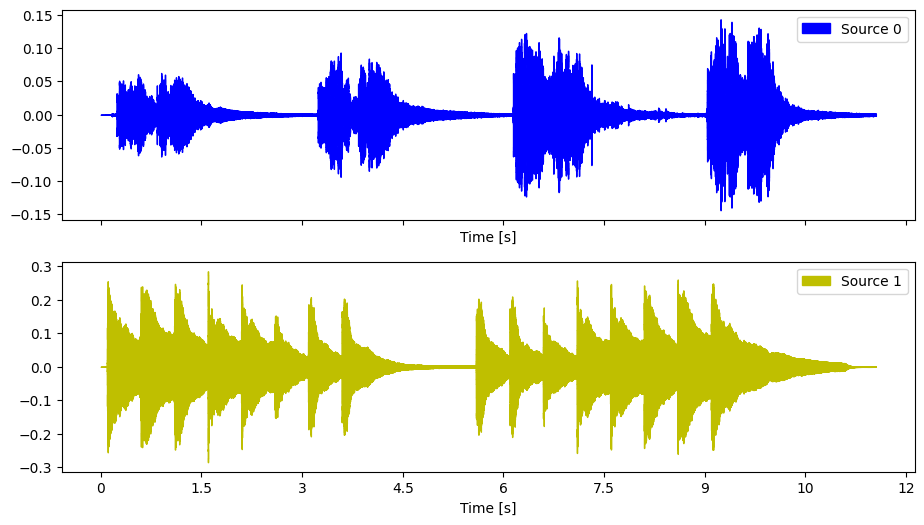

In [9]:
plot(orgs, sr)

In [10]:
part1, sr = librosa.load('../data/sound2_mix.mp3')
part2, sr = librosa.load('../data/sound1_mix.mp3')

trim = min(len(part1), len(part2))

part1 = part1[:trim]
part2 = part2[:trim]

x = np.array([part1, part2])

display(ipd.Audio(part1, rate = sr))
display(ipd.Audio(part2, rate = sr))

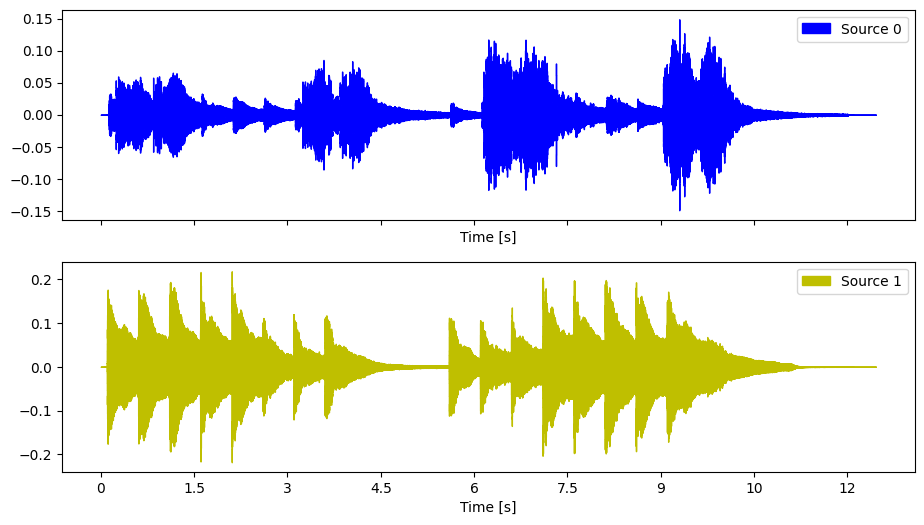

In [11]:
plot(x, sr)

In [17]:
channels = 2
D = librosa.stft(part1, n_fft=FRAME1, hop_length=HOP)
magnitude = np.abs(D) 
source_spectrograms, W, H, assignments = nmf.NMF(magnitude, rank=2, num_sources=channels, cost_type='is', sparsity=0.1)

d:\BOSS\Desktop\LA_project\.git\LA_Project_SS\src\nmf.py:71: RuntimeWarning: divide by zero encountered in log
  and sparsity constraints
d:\BOSS\Desktop\LA_project\.git\LA_Project_SS\src\nmf.py:136: RuntimeWarning: invalid value encountered in scalar subtract
  source_spectrograms : list of np.ndarray


Plotting component 0
Plotting component 1


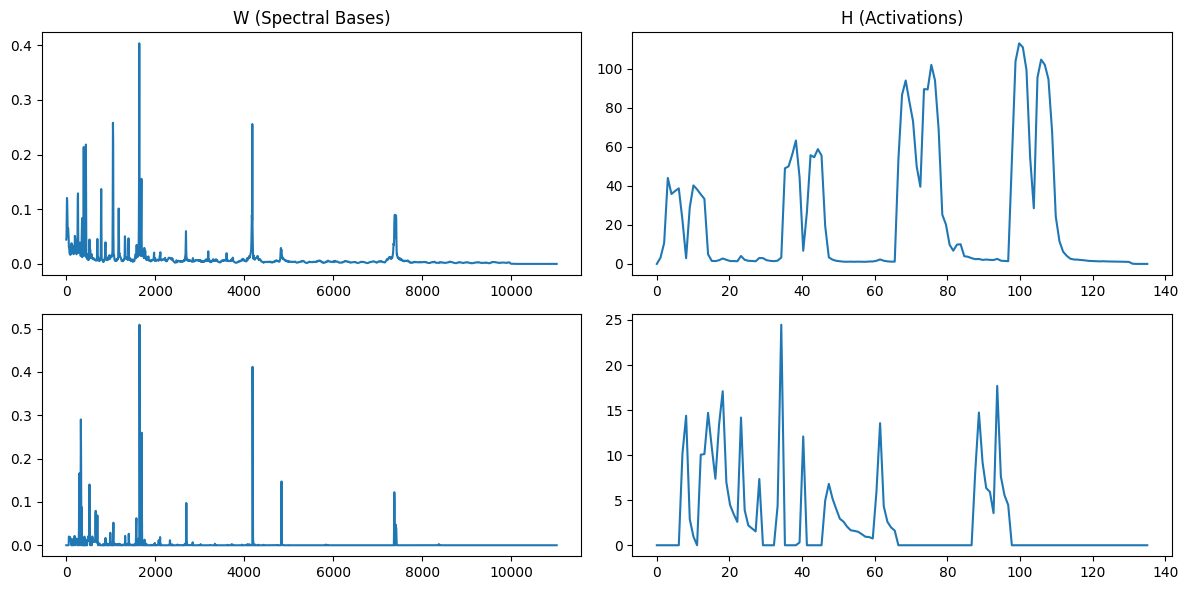

In [ ]:
rows, cols = magnitude.shape

_, axs = plt.subplots(channels, 2, figsize=(12, 3 * channels))

if channels == 1:
    axs = np.array([[axs[0], axs[1]]])
else:
    axs = np.atleast_2d(axs)

axs[0, 0].set_title('W (Spectral Bases)')
axs[0, 1].set_title('H (Activations)')

for row in range(channels):
    print(f'Plotting component {row}')
    axs[row, 0].plot(np.linspace(0, 11025, rows), W[:, row])
    axs[row, 1].plot(np.linspace(0, cols, cols), H[row, :])

plt.tight_layout()
plt.show()

In [ ]:
import librosa
import numpy as np

sound_lst = []

phase = np.angle(D)

fils_l = [[0], [1]]

for i, filters in enumerate(fils_l):
    filtered = W[:, filters] @ H[np.ix_(filters, range(H.shape[1]))]
    
    reconst = filtered * np.exp(1j * phase)
    
    new_sound = librosa.istft(reconst, n_fft=FRAME1, hop_length=HOP)
    sound_lst.append(new_sound)


In [23]:
sound_1 = sound_lst[0]
display(ipd.Audio(sound_1, rate=sr))
sound_2 = sound_lst[1]
display(ipd.Audio(sound_2, rate=sr))

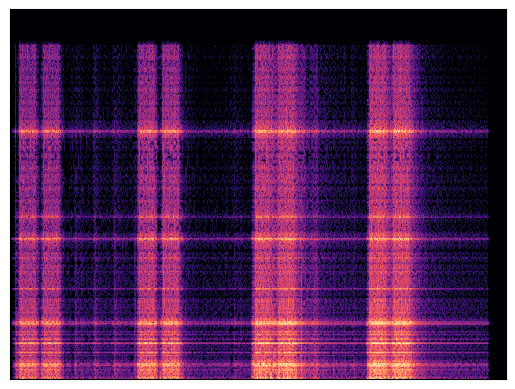

In [27]:
plot_spectogram(sound_1, sr)

In [28]:
spd = spectral_difference(part1_org, sound_1)
print("Spectral difference beetween original and separated : ", spd)

Spectral difference beetween original and separated :  0.11741293967847888


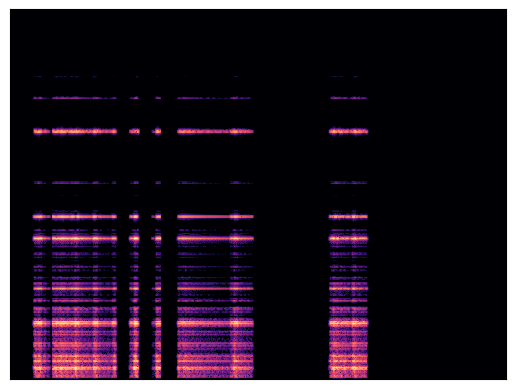

In [29]:
plot_spectogram(sound_2, sr)

In [30]:
spd = spectral_difference(part2_org, sound_2)
print("Spectral difference beetween original and separated : ", spd)

Spectral difference beetween original and separated :  0.14260247597371734
